In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import os

import rasterio
from rasterio.plot import show

First check that the bounding box is over the catchment in question.

   FID                                           geometry
0    0  POLYGON ((-95.21039 29.50759, -96.21039 29.507...


c:\Users\carri\anaconda3\envs\geopandas_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Field LOADDATE create as date field, though DateTime requested.
  ogr_write(
c:\Users\carri\anaconda3\envs\geopandas_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 8799214517.4140625 of field SHAPESTAre of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\carri\anaconda3\envs\geopandas_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 8034258689.1640625 of field SHAPESTAre of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\carri\anaconda3\envs\geopandas_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 4721511311.7109375 of field SHAPESTAre of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\carri\anaconda3\envs\geopandas_env\Lib\site-p

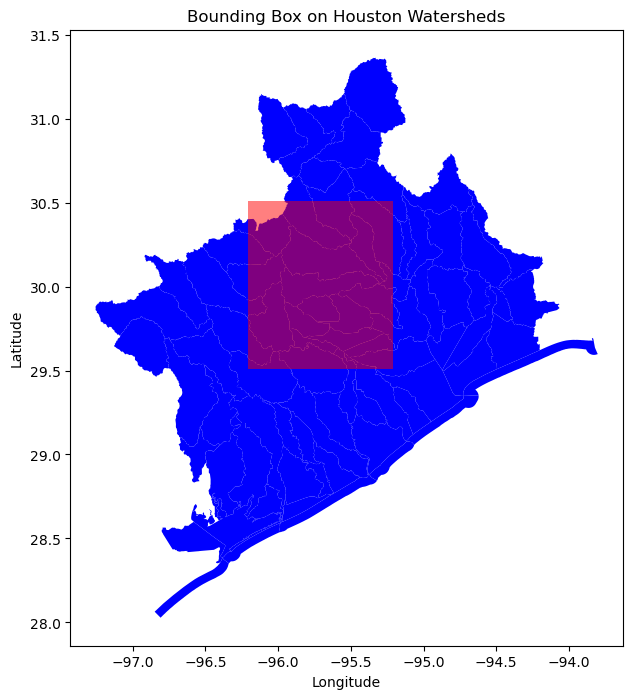

In [3]:
# Set up working directory
workspace = os.path.dirname(os.getcwd()) # current folder

# Load shapefile
shapefile_path = "%s/data\\huc10\\centroid_bounding_box.shp" % workspace
bbox_gdf = gpd.read_file(shapefile_path)
print(bbox_gdf)

# Load  shapefile (replace with a suitable coastline dataset)
boundary_path = "%s/data\\huc10\\HGAC_HUC_10_Watersheds\\HGAC_HUC_10_Watersheds.shp" % workspace
boundary_gdf = gpd.read_file(boundary_path)

# Reproject the watersheds to WGS84
boundary_wgs84 = boundary_gdf.to_crs(4326)

# Save the reprojected coastline (optional)
wgs84_watersheds_path = "%s/data//huc10/watersheds_WGS84.shp" % workspace
boundary_wgs84.to_file(wgs84_watersheds_path)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the coastline
boundary_wgs84.plot(ax=ax, color='blue', linewidth=0.5)

# Plot the bounding box
bbox_gdf.plot(ax=ax, color='red', linewidth=2, alpha=0.5)

# Set the title and axis labels
ax.set_title("Bounding Box on Houston Watersheds")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# # Adjust the plot limits if needed
# ax.set_xlim(min_lon - 0.5, max_lon + 0.5)
# ax.set_ylim(min_lat - 0.5, max_lat + 0.5)

# Show the plot
plt.show()

We have a bounding box in WGS84 coordinates that has the watershed inside. The next thing to do is check the DEM.

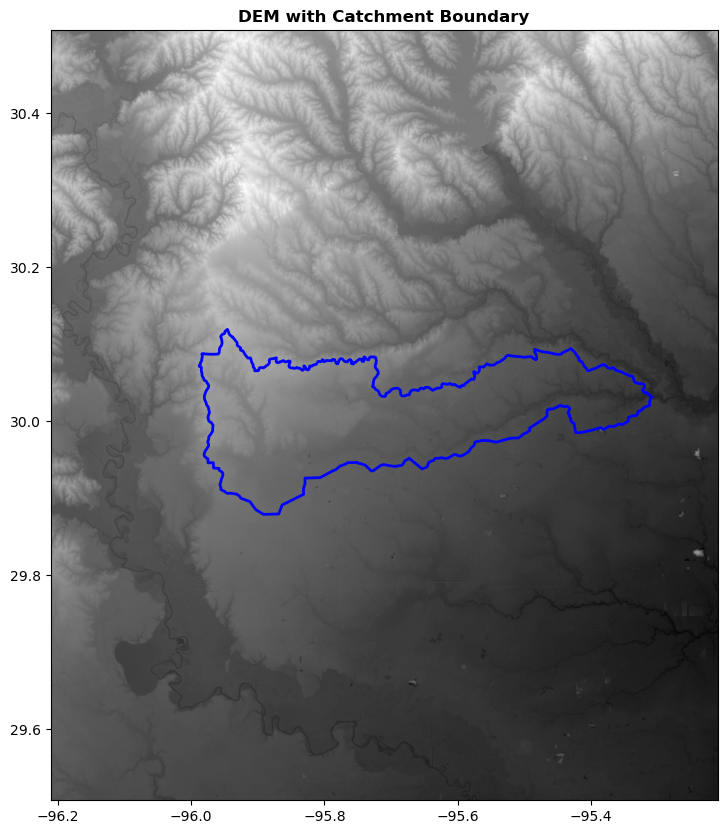

In [4]:
# Check the DEM
# Paths
dem_path = "%s/data/dem/USGS_30m_DEM.tif" % workspace
watershed_shapefile_path = "%s/data/huc10/cypress_creek_watershed.shp" % workspace 

with rasterio.open(dem_path) as dem:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(dem, ax=ax, title="DEM with Catchment Boundary", cmap="gray")  # Set cmap for DEM
    
    gdf = gpd.read_file(watershed_shapefile_path)
    
    gdf.boundary.plot(ax=ax, color="blue", linewidth=2) 
    plt.show()


Continuing with the static data, get Polaris


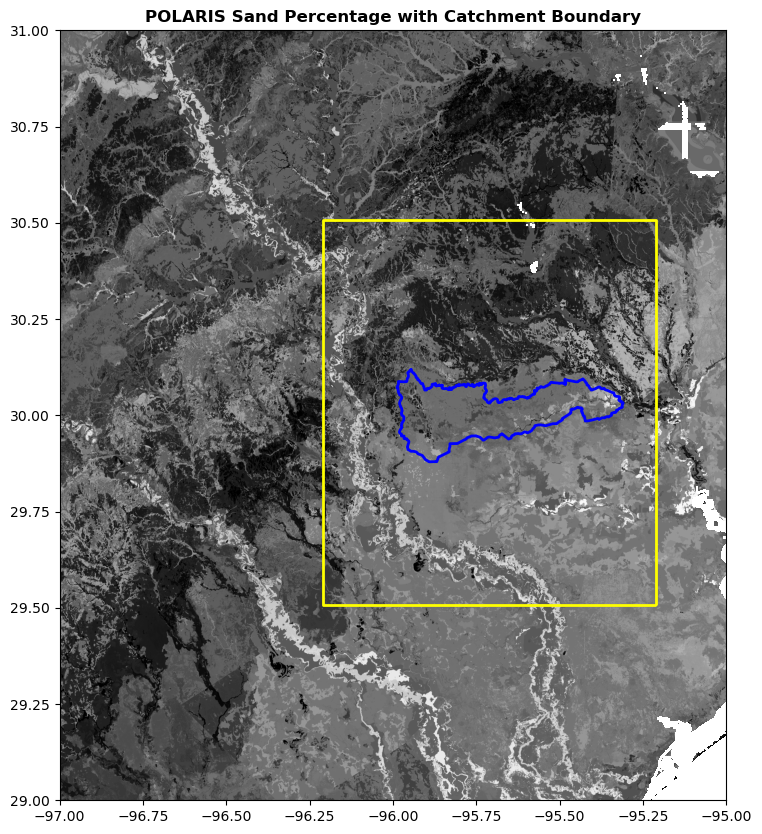

In [5]:
# Example
polaris_ex_path = "%s/data/polaris/processed/silt/merged/merged_silt_15_30.tif" % workspace


with rasterio.open(polaris_ex_path) as dem:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(dem, ax=ax, title="POLARIS Silt Percentage with Catchment Boundary", cmap="gray")  # Set cmap for DEM
    
    gdf = gpd.read_file(watershed_shapefile_path)
    
    gdf.boundary.plot(ax=ax, color="blue", linewidth=2)
    bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

    plt.show()


Downloaded NLCD by modifying an existing script from the LandCoverDownloader Github.

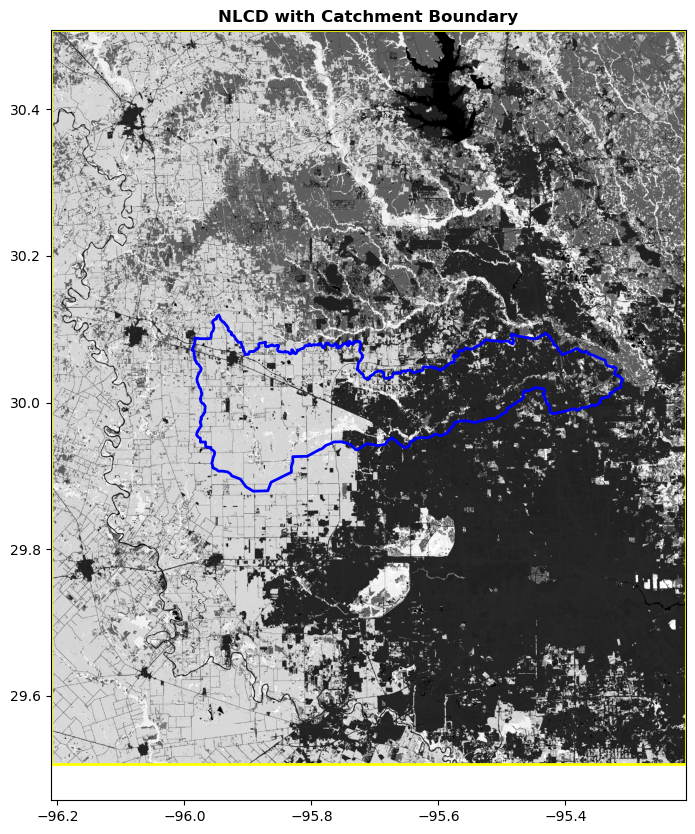

In [6]:
nlcd_path = "%s/data/nlcd/nlcd_2016_cropped.tif" % workspace

with rasterio.open(nlcd_path) as dem:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(dem, ax=ax, title="NLCD with Catchment Boundary", cmap="gray")  # Set cmap for DEM
    
    gdf = gpd.read_file(watershed_shapefile_path)
    
    gdf.boundary.plot(ax=ax, color="blue", linewidth=2)
    bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

    plt.show()
